# Analiza jakości życia

Źródło danych: "https://www.kaggle.com/datasets/mahdimashayekhi/mental-health/data"

Baza danych zawiera informacje dotyczące zdrowia i stylu życia badanych osób. Zbiór danych składa się z następujących kolumn:

- **Gender** - płeć respondenta  
- **Age** - wiek respondenta  
- **Occupation** - zawód respondenta  
- **Sleep Duration** - średnia liczba godzin snu na dobę  
- **Quality of Sleep** - jakość snu (w skali od 1 do 10)  
- **Physical Activity Level** - poziom aktywności fizycznej  (ilość minut jaką poświęca respondent na aktywność fizyczną dziennie)
- **Stress Level** - poziom odczuwanego stresu   (w skali od 1 do 10) 
- **BMI Category** - kategoria BMI (np. niedowaga, prawidłowa masa, nadwaga, otyłość)  
- **Blood Pressure** - ciśnienie krwi (systolic/diastolic), wskazujące ciśnienie skurczowe i rozkurczowe  
- **Heart Rate** - spoczynkowe tętno w uderzeniach na minutę (bpm)  
- **Daily Steps** - liczba kroków wykonywanych dziennie  
- **Sleep Disorder** - informacja o występowaniu zaburzeń snu (brak danych dla niektórych respondentów)

## Import bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import LinearSegmentedColormap
import random

## Wczytanie danych

In [2]:
df_raw = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df_raw.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Struktura danych

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Sprawdzanie ilośći NaN

In [4]:
df_raw.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

## Zamiana NaN na None w kolumnie Sleep Disorder

In [5]:
df_raw["Sleep Disorder"][df_raw["Sleep Disorder"].isnull() == True] = "None"
df_raw

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Sprawdzanie zduplikowanych kolumn

In [6]:
duplicated_rows = df_raw.duplicated()
print(duplicated_rows[duplicated_rows == True].sum())

0


## Usunięcie niepotrzebnej kolumny

In [7]:
df = df_raw.drop("Person ID", axis = 1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Statystyki zmiennych numerycznych

In [8]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Kolorystyka do wykresów

In [9]:
colors=['#fbf8ccff','#fde4cfff','#ffcfd2ff','#f1c0e8ff','#cfbaf0ff','#a3c4f3ff','#90dbf4ff','#8eecf5ff','#98f5e1ff','#b9fbc0ff','#DBE19E']
c_map_nasza = LinearSegmentedColormap.from_list("nasz_gradient",colors,N=256)
color_1, color_2,color_3 = random.sample(colors, 3)

## Wykresy

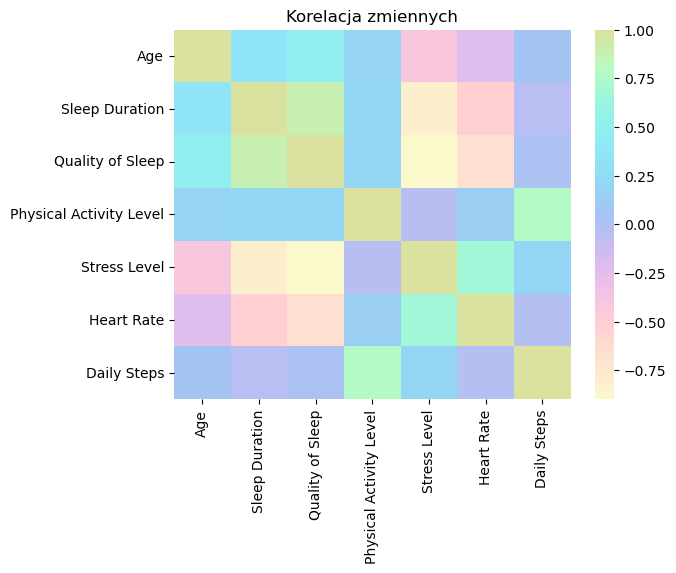

In [10]:
numeric = df.select_dtypes(include=["number"])
sns.heatmap(numeric.corr(),cmap=c_map_nasza)
plt.title("Korelacja zmiennych")
plt.show()

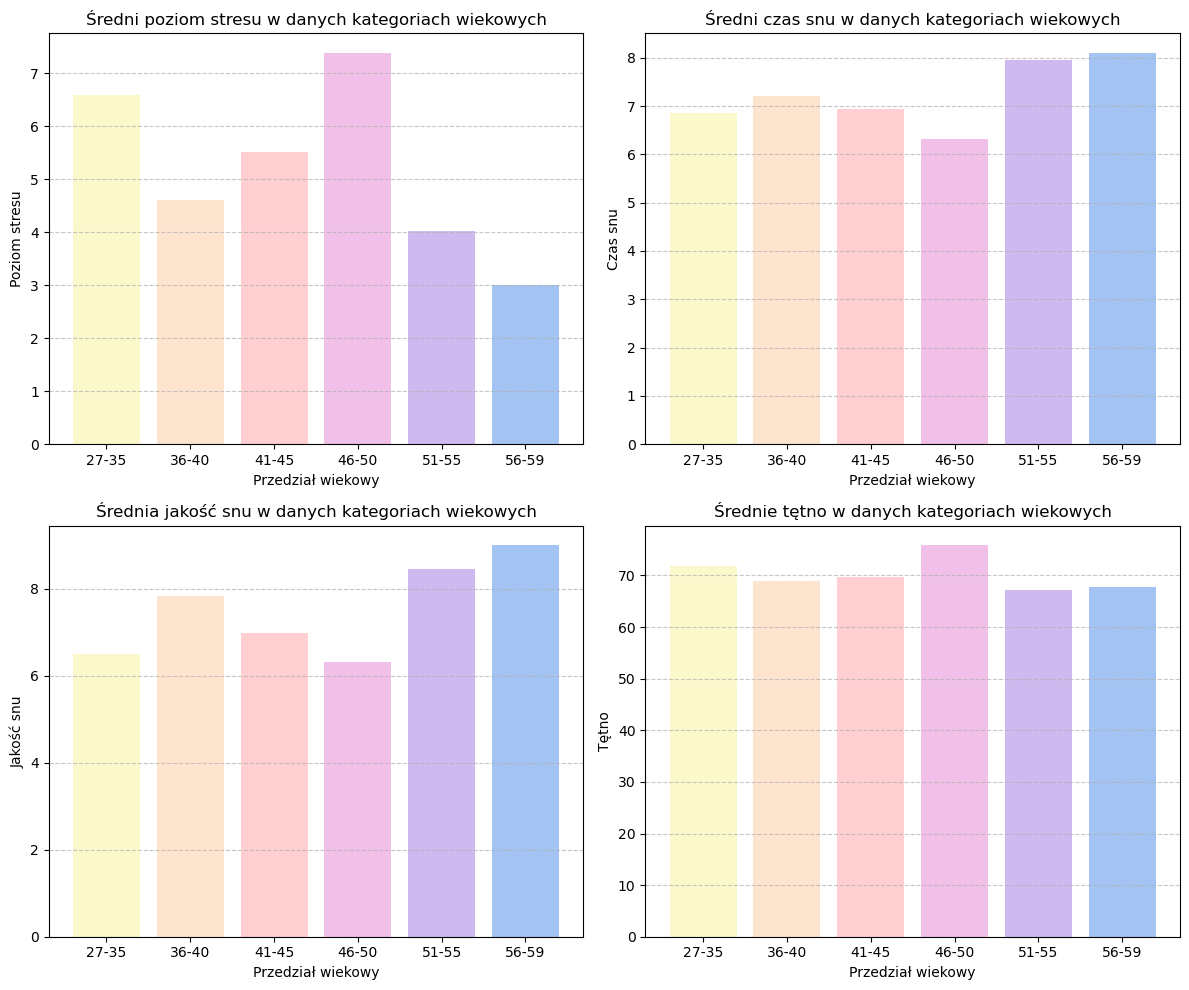

In [11]:
fig, axs = plt.subplots(2,2, figsize = (12,10))
axs = axs.ravel()

bins = [27, 35, 40, 45, 50, 55, 59]
labels = ["27-35", "36-40", "41-45", "46-50", "51-55", "56-59"]
df["age_category"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    right=True
)
sr_stress_wgl_wieku = df.groupby("age_category")["Stress Level"].mean()
sr_sleep_dur_wg_wieku = df.groupby("age_category")["Sleep Duration"].mean()
sr_sleep_qual_wgl_wieku = df.groupby("age_category")["Quality of Sleep"].mean()
sr_heart_rate_wgl_wieku = df.groupby("age_category")["Heart Rate"].mean()
x = sr_stress_wgl_wieku.index.tolist()
y = [sr_stress_wgl_wieku.values.tolist(), sr_sleep_dur_wg_wieku.values.tolist(), sr_sleep_qual_wgl_wieku.values.tolist(), sr_heart_rate_wgl_wieku.values.tolist()]
tytuly = ["Średni poziom stresu w danych kategoriach wiekowych", "Średni czas snu w danych kategoriach wiekowych", "Średnia jakość snu w danych kategoriach wiekowych", "Średnie tętno w danych kategoriach wiekowych"]
y_label = ["Poziom stresu", "Czas snu", "Jakość snu", "Tętno"]
for i in range(4):
    axs[i].bar(x,y[i],color=colors)
    axs[i].set_xlabel("Przedział wiekowy")
    axs[i].set_ylabel(y_label[i])
    axs[i].grid(axis="y", linestyle='--', alpha=0.7)
    axs[i].set_title(tytuly[i])
plt.tight_layout()
plt.show()

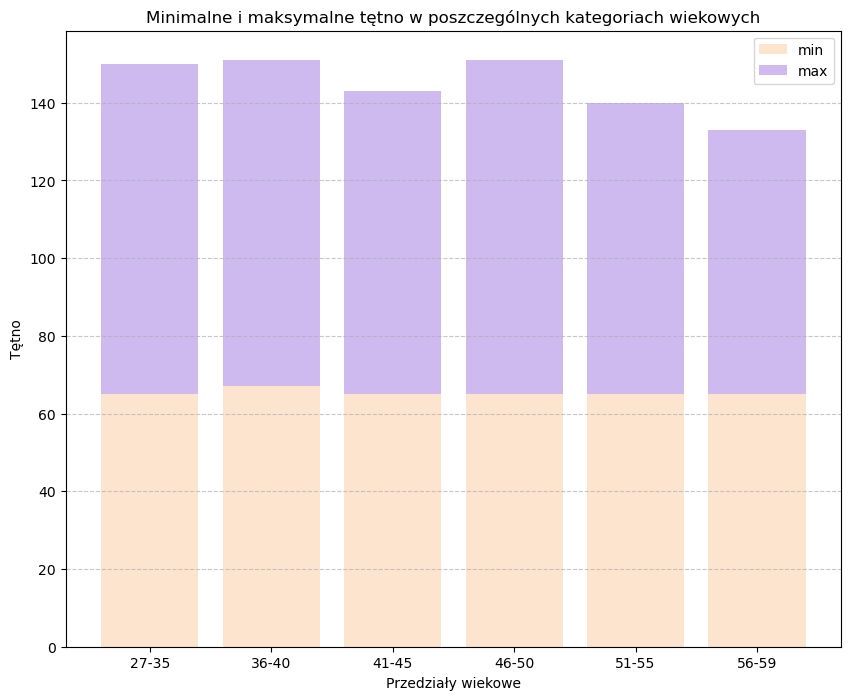

In [12]:
min_heart_wzgl_wieku = df.groupby("age_category")["Heart Rate"].min()
max_heart_wzgl_wieku = df.groupby("age_category")["Heart Rate"].max()

x = np.arange(len(max_heart_wzgl_wieku.index))

plt.figure(figsize = (10,8))
plt.bar(x, min_heart_wzgl_wieku.values, color = colors[1], label = "min")
plt.bar(x, max_heart_wzgl_wieku.values, color = colors[4], label = "max", bottom = min_heart_wzgl_wieku.values)
plt.xlabel("Przedziały wiekowe")
plt.ylabel("Tętno")
plt.xticks(x, max_heart_wzgl_wieku.index)
plt.title("Minimalne i maksymalne tętno w poszczególnych kategoriach wiekowych")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Zawody

In [13]:
ilosc_zawodow = df["Occupation"].value_counts()
ilosc_zawodow

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

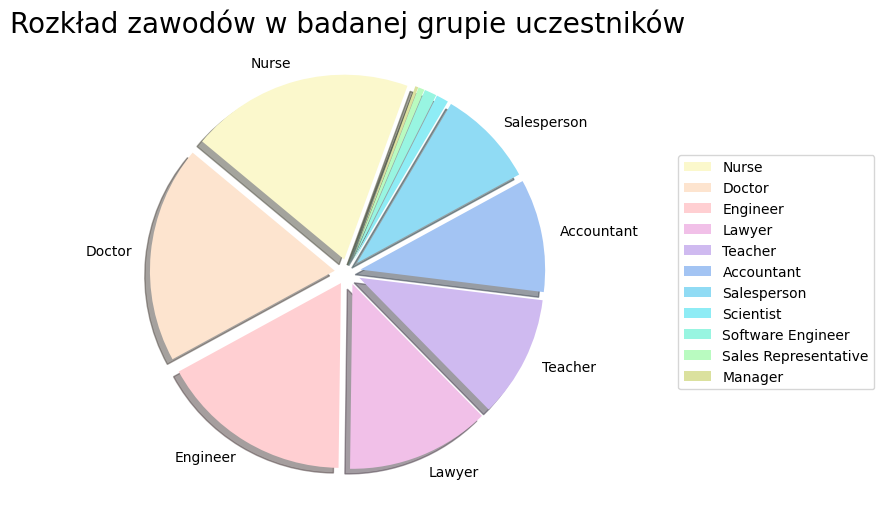

In [14]:
plt.figure(figsize = (12,6))
labels = [label if val > 10 else "" for label, val in zip(ilosc_zawodow.index, ilosc_zawodow.values)]
plt.pie(ilosc_zawodow.values, labels = labels, colors = colors, explode = [0.07 for _ in range(len(ilosc_zawodow))], shadow=True, startangle=70, textprops={'fontsize': 10})
plt.legend(ilosc_zawodow.index, loc="center left", bbox_to_anchor=(1.2, 0.5))
plt.title("Rozkład zawodów w badanej grupie uczestników", fontsize = 20)
plt.show()

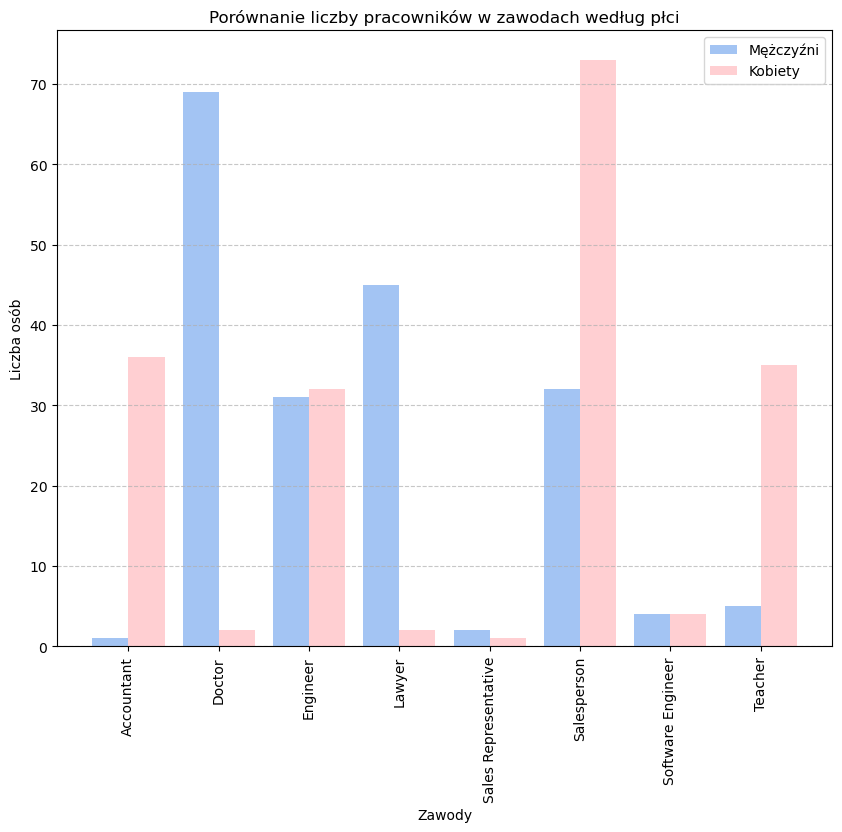

In [15]:
zawody_men = df[df["Gender"] == "Male"].groupby("Occupation").size()
zawody_women = df[df["Gender"] == "Female"].groupby("Occupation").size()

size = 0.4
x = np.arange(len(zawody_men))

plt.figure(figsize = (10,8))
plt.bar(x - size/2, zawody_men.values, color = colors[5], width = size, label = "Mężczyźni")
plt.bar(x + size/2, zawody_women.values, color = colors[2], width = size, label = "Kobiety")
plt.xlabel("Zawody")
plt.ylabel("Liczba osób")
plt.xticks(x, zawody_men.index, rotation = 90)
plt.title("Porównanie liczby pracowników w zawodach według płci")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.legend()
plt.show()

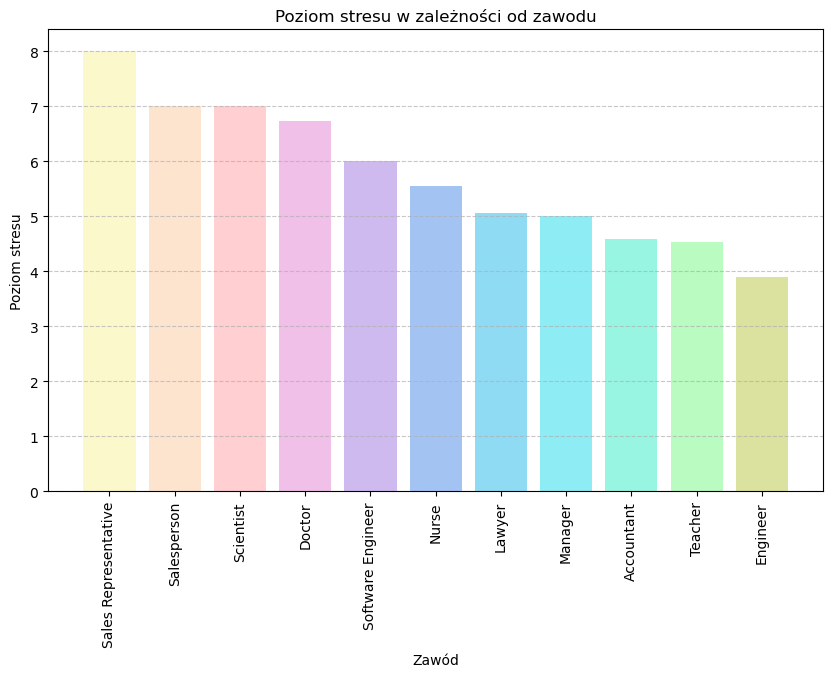

In [16]:
sr_stress_wzgl_zawodu = df.groupby("Occupation")["Stress Level"].mean().sort_values(ascending = False)
zawody = sr_stress_wzgl_zawodu.index
plt.figure(figsize = (10,6))
plt.bar(np.arange(len(zawody)), sr_stress_wzgl_zawodu,color=colors)
plt.xticks(np.arange(len(zawody)),zawody, rotation = 90)
plt.xlabel("Zawód")
plt.ylabel("Poziom stresu")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.title("Poziom stresu w zależności od zawodu")
plt.show()

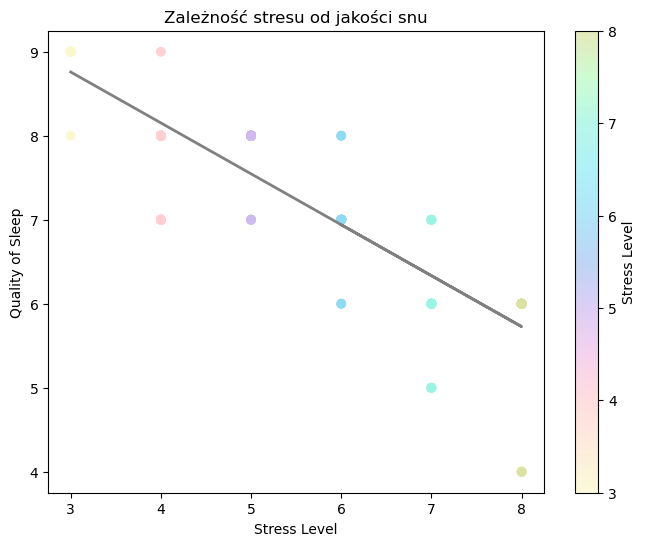

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["Stress Level"],
    df["Quality of Sleep"],
    c=df["Stress Level"],
    cmap=c_map_nasza,
    alpha=0.7
)
coef = np.polyfit(df["Stress Level"], df["Quality of Sleep"], 1)
trend = np.poly1d(coef)

plt.plot(df["Stress Level"], trend(df["Stress Level"]), linewidth=2, color = "gray")
plt.colorbar(label="Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Zależność stresu od jakości snu")
plt.show()


Średnie ciśnienie kwrwi w zależności od kategorii BMI osoby:
 BMI Category
Nadwaga            135/90
Niedowaga          124/81
Otyłość            139/90
Prawidłowa waga    122/80
Name: Blood Pressure, dtype: object 



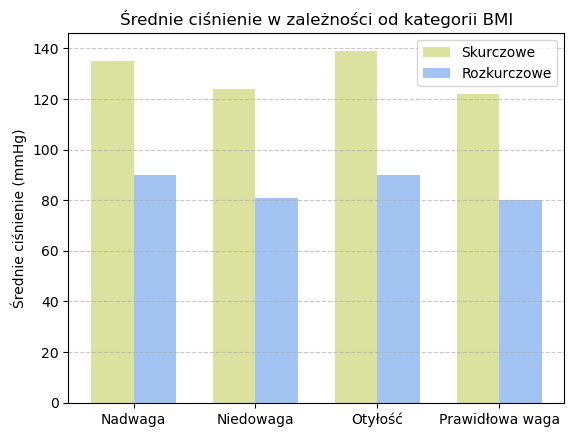

In [18]:
df['BMI Category'] = df['BMI Category'].replace({'Normal': 'Niedowaga','Normal Weight': 'Prawidłowa waga','Overweight': 'Nadwaga','Obese': 'Otyłość'})

srednia_blood_pres = df['Blood Pressure'].str.split("/", expand=True).astype(int)
df['Systolic'] = srednia_blood_pres[0]
df['Diastolic'] = srednia_blood_pres[1]

srednia_blood_pres_ogol = df.groupby('BMI Category')[['Systolic','Diastolic']].mean().round()

srednia_blood_pres_ogol['Blood Pressure']=srednia_blood_pres_ogol['Systolic'].astype(int).astype(str)+"/"+srednia_blood_pres_ogol['Diastolic'].astype(int).astype(str)
print("Średnie ciśnienie kwrwi w zależności od kategorii BMI osoby:\n",srednia_blood_pres_ogol['Blood Pressure'],"\n")
categories = srednia_blood_pres_ogol.index
systolic = srednia_blood_pres_ogol['Systolic']
diastolic = srednia_blood_pres_ogol['Diastolic']

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, systolic, width, label='Skurczowe',color=color_1)
plt.bar(x + width/2, diastolic, width, label='Rozkurczowe',color=color_2)

plt.xticks(x, categories)
plt.ylabel('Średnie ciśnienie (mmHg)')
plt.title('Średnie ciśnienie w zależności od kategorii BMI')
plt.legend()
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

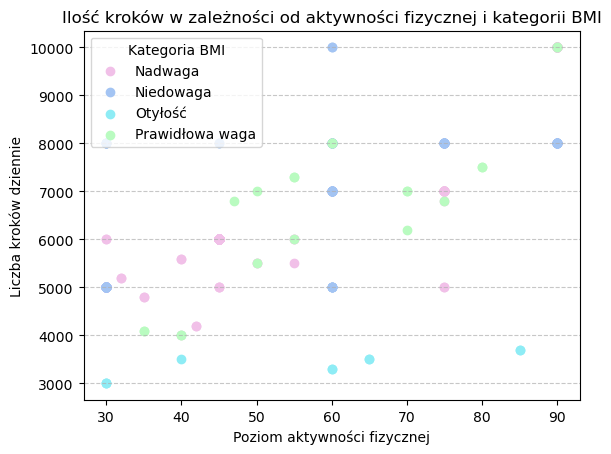

In [19]:
bmi_categories = df['BMI Category'].unique()
for i,cat in enumerate(bmi_categories):
    subset = df[df['BMI Category'] == cat]
    plt.scatter(subset['Physical Activity Level'],subset['Daily Steps'],label=cat,color=colors[2*i+3])

plt.xlabel("Poziom aktywności fizycznej")
plt.ylabel("Liczba kroków dziennie")
plt.title("Ilość kroków w zależności od aktywności fizycznej i kategorii BMI")
plt.legend(title="Kategoria BMI",loc="upper left")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

Sleep Disorder  Insomnia  None  Sleep Apnea
Gender                                     
Female                36    82           67
Male                  41   137           11 



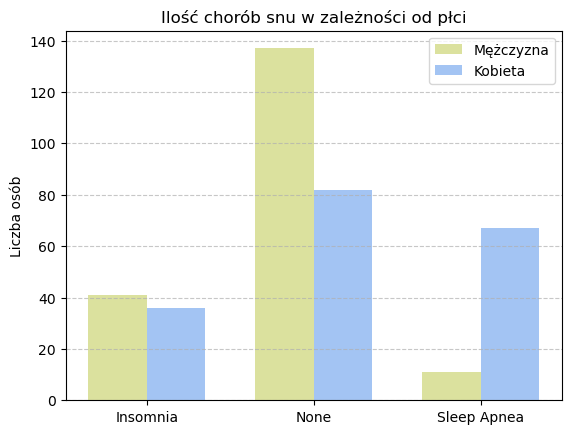

In [20]:
ilosc = df.groupby("Gender")["Sleep Disorder"].value_counts().unstack()
print(ilosc,"\n")

x = np.arange(len(ilosc.columns))
width = 0.35

plt.bar(x - width/2, ilosc.loc['Male'], width, label='Mężczyzna',color=color_1)
plt.bar(x + width/2, ilosc.loc['Female'], width, label='Kobieta',color=color_2)

plt.xticks(x, ilosc.columns)
plt.ylabel("Liczba osób")
plt.title("Ilość chorób snu w zależności od płci")
plt.legend()
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

Quality of Sleep
4    5.86
5    6.50
6    6.20
7    7.14
8    7.40
9    8.24
Name: Sleep Duration, dtype: float64 



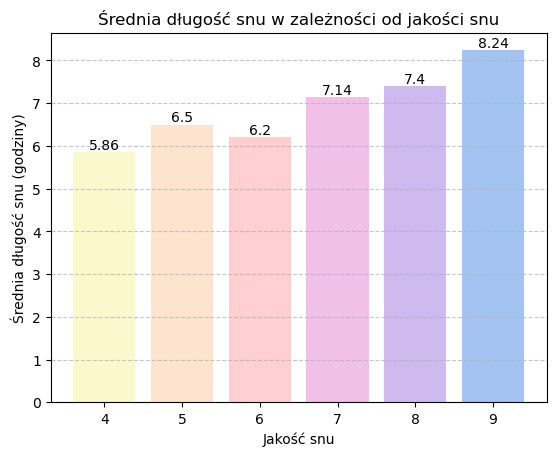

In [21]:
dlugosc_snu = df.groupby('Quality of Sleep')['Sleep Duration'].mean().round(2)
print(dlugosc_snu,"\n")

plt.bar(dlugosc_snu.index, dlugosc_snu.values,color=colors)
plt.xlabel("Jakość snu")
plt.ylabel("Średnia długość snu (godziny)")
plt.title("Średnia długość snu w zależności od jakości snu")
plt.grid(axis="y", linestyle='--', alpha=0.7)
for i, v in zip(dlugosc_snu.index, dlugosc_snu.values):
    plt.text(i, v + 0.07, f"{v}", ha='center')
plt.show()

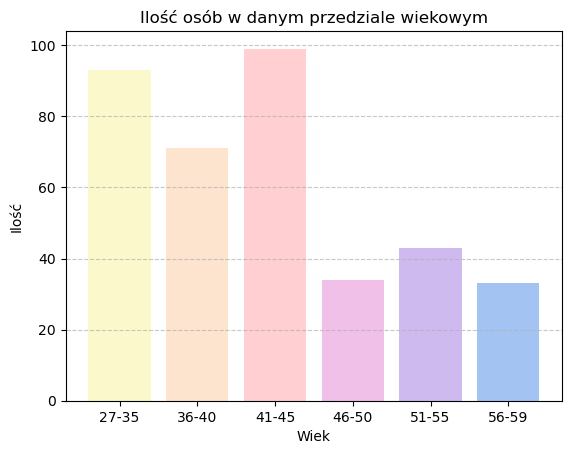

In [22]:
 bins = [27, 35, 40, 45, 50, 55, 59]
labels = ["27-35", "36-40", "41-45", "46-50", "51-55", "56-59"]

df["age_category"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    right=True
)
ilosc_osob_w_danym_wieku = df.groupby("age_category").size()
plt.bar(ilosc_osob_w_danym_wieku.index,ilosc_osob_w_danym_wieku.values,color=colors)
plt.title('Ilość osób w danym przedziale wiekowym')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.xlabel('Wiek')
plt.ylabel('Ilość')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

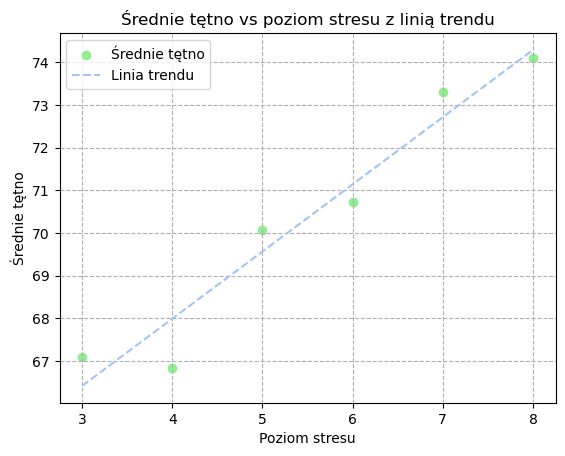

In [23]:
średnie = df.groupby('Stress Level')['Heart Rate'].mean()
x = średnie.index.values
y = średnie.values

plt.scatter(x, y, label='Średnie tętno', color="lightgreen")

slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
plt.plot(x, y_pred, color=colors[5], linestyle='--', label='Linia trendu',)

plt.xlabel('Poziom stresu')
plt.ylabel('Średnie tętno')
plt.title('Średnie tętno vs poziom stresu z linią trendu')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [24]:
dane= df.groupby("Occupation")[["Physical Activity Level","Sleep Duration"]].mean().round(2)
dane=pd.DataFrame(dane)
dane

,Physical Activity Level,Sleep Duration
Occupation,,
Accountant,58.11,7.11
Doctor,55.35,6.97
Engineer,51.86,7.99
Lawyer,70.43,7.41
Manager,55.00,6.90
Nurse,78.59,7.06
Sales Representative,30.00,5.90
Salesperson,45.00,6.40
Scientist,41.00,6.00


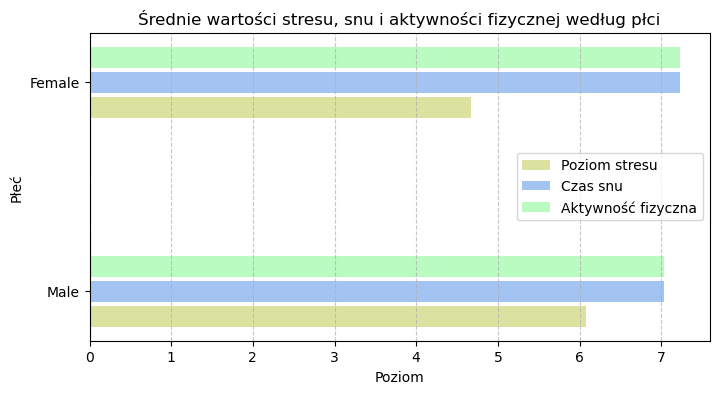

In [25]:
y = np.arange(len(df["Gender"].unique()))
sr_stress_kobiet = df[df["Gender"] == "Female"]["Stress Level"].mean()
sr_stress_mez = df[df["Gender"] == "Male"]["Stress Level"].mean()

sr_sleep_dur_kobiet = df[df["Gender"] == "Female"]["Sleep Duration"].mean()
sr_sleep_dur_mez = df[df["Gender"] == "Male"]["Sleep Duration"].mean()

sr_aktywnosc_kobiet = df[df["Gender"] == "Female"]["Sleep Duration"].mean()
sr_aktywnosc_mez = df[df["Gender"] == "Male"]["Sleep Duration"].mean()

size = 0.1
plt.figure(figsize = (8,4))
plt.barh(y - size - 0.02, [sr_stress_mez, sr_stress_kobiet], height = size, label = "Poziom stresu",color=color_1)
plt.barh(y, [sr_sleep_dur_mez, sr_sleep_dur_kobiet], height = size, label = "Czas snu",color=color_2)
plt.barh(y + size + 0.02, [sr_aktywnosc_mez, sr_aktywnosc_kobiet], height = size, label = "Aktywność fizyczna",color=color_3)
plt.yticks(y , df["Gender"].unique())
plt.ylabel("Płeć")
plt.xlabel("Poziom")
plt.title("Średnie wartości stresu, snu i aktywności fizycznej według płci")
plt.grid(axis="x", linestyle='--', alpha=0.7)
plt.legend()
plt.show()